In [36]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
BASE_PATH = os.path.join(os.getcwd(), "..", "..", "..")
MODULES_PATH = os.path.join(BASE_PATH, "modules")
METRICS_PATH = os.path.join(BASE_PATH, "metrics")

In [39]:
sys.path.append(MODULES_PATH)
sys.path.append(os.path.join(BASE_PATH, "tf_al"))

In [40]:
from tf_al import ExperimentSuitMetrics
from utils import MetricsTransformer, Frame, ExperimentFrame

In [42]:
dtypes = {
    "run": int,
    "iteration": int,
    "train_time": float,
    "eval_sparse_categorical_crossentropy": float,
    "eval_sparse_categorical_accuracy": float,
    "query_time": float,
    "labeled_pool_size": int,
    "unlabeled_pool_size": int,
    "method": str
}

In [8]:
#train_loss train_sparse_categorical_accuracy train_time query_time eval_sparse_categorical_crossentropy eval_sparse_categorical_accuracy eval_time indices_selected iteration labeled_pool_size unlabeled_pool_size

In [536]:
base_experiment_path = os.path.join(METRICS_PATH, "temp_1")
metrics_handler = ExperimentSuitMetrics(base_experiment_path)
df_mp = MetricsTransformer.load_from_dir(metrics_handler, "moment_propagation", dtype=dtypes)

In [542]:
%autoreload 2
from utils import ExperimentFrame, FrameScores, Frame, Stats
df_mp = MetricsTransformer.load_from_dir(metrics_handler, "moment_propagation", dtype=dtypes)
scores = FrameScores(accuracy_column="eval_sparse_categorical_accuracy")
frame = ExperimentFrame(df_mp, scores=scores)

In [543]:
df_mp = frame.get_frame()

<AxesSubplot:xlabel='labeled_pool_size', ylabel='eval_sparse_categorical_crossentropy'>

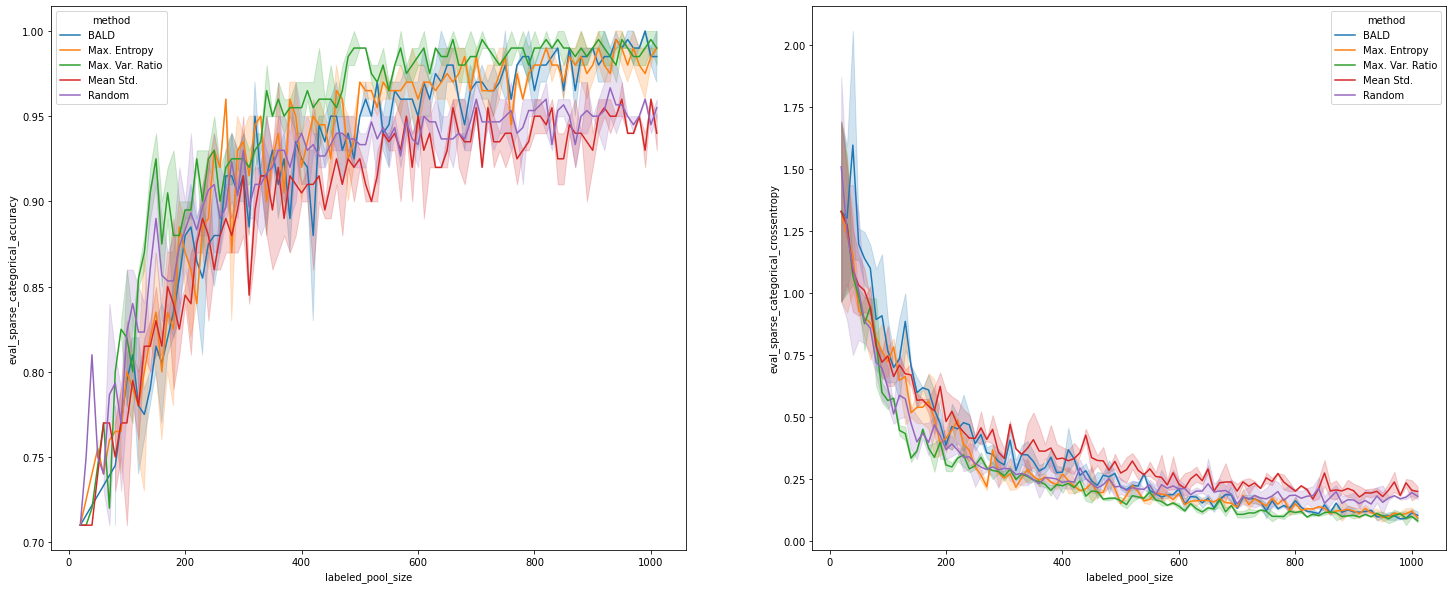

In [560]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

selector = df_mp["eval_sparse_categorical_accuracy"] > .7
sns.lineplot(ax=ax[0], data=df_mp[selector], x="labeled_pool_size", y="eval_sparse_categorical_accuracy", hue="method")

sns.lineplot(ax=ax[1], data=df_mp, x="labeled_pool_size", y="eval_sparse_categorical_crossentropy", hue="method")

<AxesSubplot:xlabel='labeled_pool_size', ylabel='query_time'>

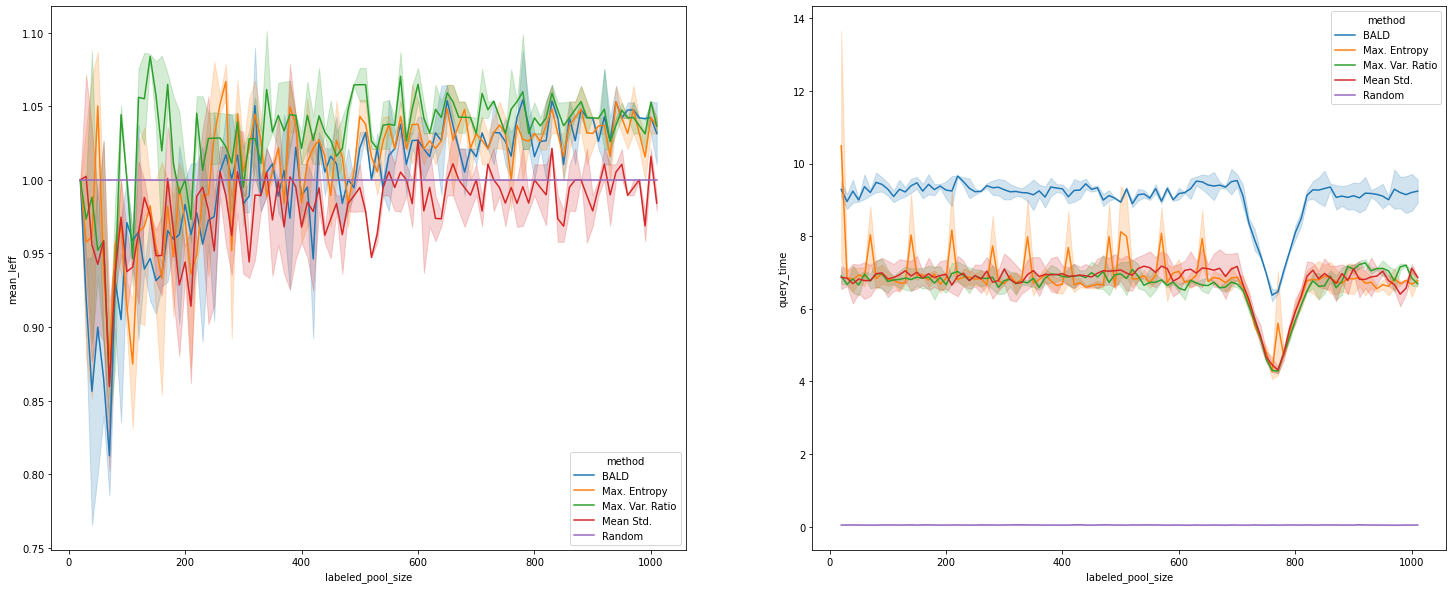

In [561]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))
sns.lineplot(ax=ax[0], data=df_mp, x="labeled_pool_size", y="mean_leff", hue="method")
sns.lineplot(ax=ax[1], data=df_mp, x="labeled_pool_size", y="query_time", hue="method")

In [553]:
df_mean = frame.get_mean_frame()

<AxesSubplot:xlabel='labeled_pool_size', ylabel='query_time'>

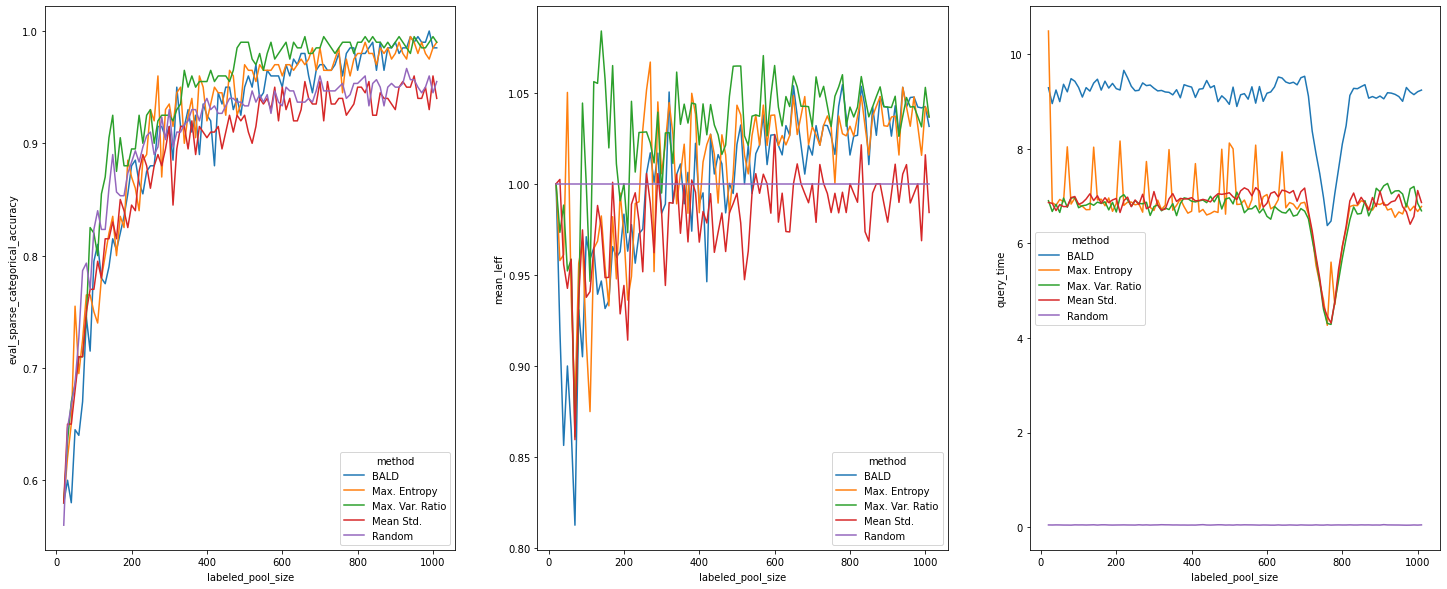

In [559]:
fig, ax = plt.subplots(1, 3, figsize=(25, 10))
sns.lineplot(ax=ax[0], data=df_mean, x="labeled_pool_size", y="eval_sparse_categorical_accuracy", hue="method")
sns.lineplot(ax=ax[1], data=df_mean, x="labeled_pool_size", y="mean_leff", hue="method")
sns.lineplot(ax=ax[2], data=df_mean, x="labeled_pool_size", y="query_time", hue="method")

In [545]:
# Qeff std wird noch falsch berechnet hier
Stats.qeff(mp_mean)

,model,method,mean_qeff,std_qeff
0,Moment Propagation,BALD,0.000000,1.000000
0,Moment Propagation,Max. Entropy,0.278584,0.562889
0,Moment Propagation,Max. Var. Ratio,0.277992,0.589297
0,Moment Propagation,Mean Std.,0.274198,0.590155
0,Moment Propagation,Random,1.000000,0.000000


In [566]:
acc_per_dp = Stats.per_points(frame.get_frame(), 100, model=False, key="eval_sparse_categorical_accuracy")
acc_per_dp.T

Method                  BALD                                                \
Labeled Datapoints      100       200       300       400   500       600    
Mean                0.795000  0.880000  0.915000  0.925000  0.95  0.950000   
Std                 0.021213  0.014142  0.021213  0.021213  0.00  0.028284   

Method                                              ...    Random            \
Labeled Datapoints  700       800   900       1000  ...      100       200    
Mean                0.97  0.965000  0.99  0.985000  ...  0.823333  0.883333   
Std                 0.00  0.021213  0.00  0.007071  ...  0.040415  0.020817   

Method                                                                    \
Labeled Datapoints  300   400       500       600   700       800   900    
Mean                0.93  0.94  0.933333  0.933333  0.96  0.953333  0.95   
Std                 0.01  0.01  0.011547  0.015275  0.01  0.005774  0.00   

Method                        
Labeled Datapoints      1000  
Mean                0.945000  
Std                 0.007071  

[2 rows x 50 columns]

In [497]:
STAT_PATH = os.path.join(BASE_PATH, "stats")

In [498]:
file_path = os.path.join(STAT_PATH, "mean_acc.csv")
Stats.write(acc_per_dp, file_path)

<AxesSubplot:xlabel='method', ylabel='query_time'>

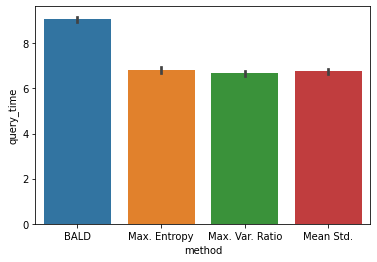

In [353]:
sns.barplot(data=Frame.filter(mp_mean, {"method": "Random"}), x="method", y="query_time")

<AxesSubplot:xlabel='method', ylabel='mean_qeff'>

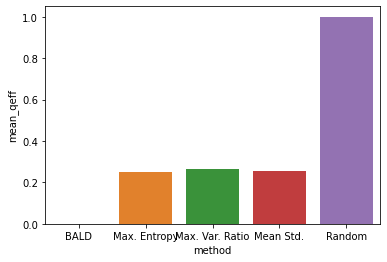

In [289]:
sns.barplot(data=mp_mean, x="method", y="mean_qeff")

<AxesSubplot:xlabel='labeled_pool_size', ylabel='eval_sparse_categorical_accuracy'>

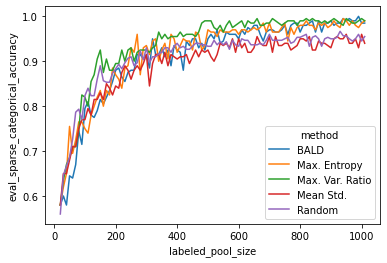

In [271]:
sns.lineplot(data=mp_mean, x="labeled_pool_size", y="eval_sparse_categorical_accuracy", hue="method")